# The Great Indian Hiring Hackathon

## Exploratory Data Analysis


In [1]:
# Import the required libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


### Importing the train and test sets


In [2]:
# Import the training data
train = pd.read_csv("../Dataset/Train.csv").set_index("TimeStamp")
train.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Date,Traffic_Vol
TimeStamp,,,,,,,,,
02/10/08 9:00,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08,5555
02/10/08 10:00,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08,4525
02/10/08 11:00,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08,4772
02/10/08 12:00,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08,5031
02/10/08 13:00,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08,4928


In [3]:
# Import the test set
test = pd.read_csv("../Dataset/Test.csv").set_index("TimeStamp")

test.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Date,Traffic_Vol
TimeStamp,,,,,,,,,
01/07/14 0:00,NaN,297.65,0.0,0,1,Clear skies,Clear skies,01/07/14,NaN
01/07/14 1:00,NaN,297.45,0.0,0,1,Clear skies,Clear skies,01/07/14,NaN
01/07/14 2:00,NaN,296.75,0.0,0,1,Rainfall,Soft rain,01/07/14,NaN
01/07/14 3:00,NaN,296.42,0.0,0,1,Rainfall,Steady rain,01/07/14,NaN
01/07/14 4:00,NaN,295.56,0.0,0,40,Rainfall,Soft rain,01/07/14,NaN


In [4]:
# change the index to date time format for training data
train.index = pd.to_datetime(train.index)

train.head()

C:\Users\AJITH\AppData\Local\Temp\ipykernel_22636\3543804180.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train.index = pd.to_datetime(train.index)


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Date,Traffic_Vol
TimeStamp,,,,,,,,,
2008-02-10 09:00:00,NaN,289.28,0.0,0.0,40,Cloudy skies,Partly cloudy skies,02/10/08,5555
2008-02-10 10:00:00,NaN,290.26,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08,4525
2008-02-10 11:00:00,NaN,290.28,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08,4772
2008-02-10 12:00:00,NaN,290.33,0.0,0.0,90,Cloudy skies,Full cloud cover,02/10/08,5031
2008-02-10 13:00:00,NaN,292.14,0.0,0.0,75,Cloudy skies,Fragmented clouds,02/10/08,4928


In [5]:
# Change the index to datetime format for the test dataset
test.index = pd.to_datetime(test.index)
test.head()

C:\Users\AJITH\AppData\Local\Temp\ipykernel_22636\3979589619.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test.index = pd.to_datetime(test.index)


,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Date,Traffic_Vol
TimeStamp,,,,,,,,,
2014-01-07 00:00:00,NaN,297.65,0.0,0,1,Clear skies,Clear skies,01/07/14,NaN
2014-01-07 01:00:00,NaN,297.45,0.0,0,1,Clear skies,Clear skies,01/07/14,NaN
2014-01-07 02:00:00,NaN,296.75,0.0,0,1,Rainfall,Soft rain,01/07/14,NaN
2014-01-07 03:00:00,NaN,296.42,0.0,0,1,Rainfall,Steady rain,01/07/14,NaN
2014-01-07 04:00:00,NaN,295.56,0.0,0,40,Rainfall,Soft rain,01/07/14,NaN


In [6]:
# Convert the date column to datetime format as well
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

C:\Users\AJITH\AppData\Local\Temp\ipykernel_22636\2351739483.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train["Date"] = pd.to_datetime(train["Date"])
C:\Users\AJITH\AppData\Local\Temp\ipykernel_22636\2351739483.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test["Date"] = pd.to_datetime(test["Date"])


### Statistical Analysis


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38373 entries, 2008-02-10 09:00:00 to 2014-06-30 23:00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Holiday             50 non-null     float64       
 1   Temperature         38373 non-null  float64       
 2   Rainfall_last_hour  38373 non-null  float64       
 3   Snowfall_last_hour  38373 non-null  float64       
 4   Cloud_Cover         38373 non-null  int64         
 5   Weather             38373 non-null  object        
 6   Weather_Desc        38373 non-null  object        
 7   Date                38373 non-null  datetime64[ns]
 8   Traffic_Vol         38373 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 2.9+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2208 entries, 2014-01-07 00:00:00 to 2014-09-30 23:00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Holiday             3 non-null      float64       
 1   Temperature         2208 non-null   float64       
 2   Rainfall_last_hour  2208 non-null   float64       
 3   Snowfall_last_hour  2208 non-null   int64         
 4   Cloud_Cover         2208 non-null   int64         
 5   Weather             2208 non-null   object        
 6   Weather_Desc        2208 non-null   object        
 7   Date                2208 non-null   datetime64[ns]
 8   Traffic_Vol         0 non-null      float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 172.5+ KB


In [9]:
train.describe()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Date,Traffic_Vol
count,50.0,38373.000000,38373.000000,38373.000000,38373.000000,38373,38373.000000
mean,1.0,281.152767,0.327486,0.000128,44.821098,2011-10-31 03:16:02.270346240,3293.947567
min,1.0,0.300000,0.000000,0.000000,0.000000,2008-01-11 00:00:00,4.000000
25%,1.0,271.910000,0.000000,0.000000,1.000000,2010-01-14 00:00:00,1246.000000
50%,1.0,281.990000,0.000000,0.000000,40.000000,2012-04-06 00:00:00,3425.000000
75%,1.0,292.140000,0.000000,0.000000,90.000000,2013-05-26 00:00:00,4964.000000
max,1.0,310.970000,9831.414286,0.512857,101.000000,2014-12-06 00:00:00,7289.000000
std,0.0,13.813324,50.194024,0.005924,38.749566,NaN,1988.311540


In [10]:
test.describe()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Date,Traffic_Vol
count,3.0,2208.000000,2208.000000,2208.0,2208.000000,2208,0.0
mean,1.0,294.276254,0.201016,0.0,37.644022,2014-07-29 06:46:57.391304448,NaN
min,1.0,274.950000,0.000000,0.0,0.000000,2014-01-07 00:00:00,NaN
25%,1.0,290.960000,0.000000,0.0,1.000000,2014-07-14 18:00:00,NaN
50%,1.0,294.785000,0.000000,0.0,21.000000,2014-08-15 12:00:00,NaN
75%,1.0,298.180250,0.000000,0.0,75.000000,2014-09-16 06:00:00,NaN
max,1.0,306.680000,10.628571,0.0,91.000000,2014-12-09 00:00:00,NaN
std,0.0,5.586447,0.697708,0.0,37.140436,NaN,NaN


### Data Cleaning

In this section, we will check for

- duplicate values
- missing values


#### Check for duplicate values


In [11]:
# check for duplicate values
train.duplicated().sum()

np.int64(0)

#### Check for missing values


In [12]:
# Check for missing values in train set
train.isna().sum()

Holiday               38323
Temperature               0
Rainfall_last_hour        0
Snowfall_last_hour        0
Cloud_Cover               0
Weather                   0
Weather_Desc              0
Date                      0
Traffic_Vol               0
dtype: int64

In [13]:
# check for missing values in test set
test.isna().sum()

Holiday               2205
Temperature              0
Rainfall_last_hour       0
Snowfall_last_hour       0
Cloud_Cover              0
Weather                  0
Weather_Desc             0
Date                     0
Traffic_Vol           2208
dtype: int64

In [14]:
train.Holiday.value_counts()

Holiday
1.0    50
Name: count, dtype: int64

In [15]:
# Fill the missing values in the train and test set Holiday column
train["Holiday"] = train["Holiday"].fillna(0)
test["Holiday"] = test["Holiday"].fillna(0)

train.isna().sum(), test.isna().sum()

(Holiday               0
 Temperature           0
 Rainfall_last_hour    0
 Snowfall_last_hour    0
 Cloud_Cover           0
 Weather               0
 Weather_Desc          0
 Date                  0
 Traffic_Vol           0
 dtype: int64,
 Holiday                  0
 Temperature              0
 Rainfall_last_hour       0
 Snowfall_last_hour       0
 Cloud_Cover              0
 Weather                  0
 Weather_Desc             0
 Date                     0
 Traffic_Vol           2208
 dtype: int64)

## Feature Engineering


**Holiday column**\
Convert the holiday into categorical column for easier distribution analysis


In [16]:
train["Holiday"] = train["Holiday"].map({0: "No", 1: "Yes"})
test["Holiday"] = test["Holiday"].map({0: "No", 1: "Yes"})

**Temperature column**\
Convert the temperature column in kelvin scale to celsius scale
`c = k - 273.15`


In [17]:
train["Temperature"] = train["Temperature"] - 273.15
test["Temperature"] = test["Temperature"] - 273.15

train.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Date,Traffic_Vol
TimeStamp,,,,,,,,,
2008-02-10 09:00:00,No,16.13,0.0,0.0,40,Cloudy skies,Partly cloudy skies,2008-02-10,5555
2008-02-10 10:00:00,No,17.11,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10,4525
2008-02-10 11:00:00,No,17.13,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10,4772
2008-02-10 12:00:00,No,17.18,0.0,0.0,90,Cloudy skies,Full cloud cover,2008-02-10,5031
2008-02-10 13:00:00,No,18.99,0.0,0.0,75,Cloudy skies,Fragmented clouds,2008-02-10,4928


**Create a day column**


In [18]:
train["Day"] = train["Date"].map(lambda x: x.day_name())
test["Day"] = test["Date"].map(lambda x: x.day_name())

## Data Reduction


In [19]:
train = train.drop("Date", axis=1)
test = test.drop("Date", axis=1)

In [20]:
# Extract the columns with object datatype
cat_columns = train.select_dtypes(include="object").columns
num_columns = train.select_dtypes(exclude="object").columns
cat_columns, num_columns

(Index(['Holiday', 'Weather', 'Weather_Desc', 'Day'], dtype='object'),
 Index(['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
        'Cloud_Cover', 'Traffic_Vol'],
       dtype='object'))

## Data Visualization


### Time Plots


In [21]:
# Create a new copy of the dataset
train_copy = train.copy()
train_copy.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Traffic_Vol,Day
TimeStamp,,,,,,,,,
2008-02-10 09:00:00,No,16.13,0.0,0.0,40,Cloudy skies,Partly cloudy skies,5555,Sunday
2008-02-10 10:00:00,No,17.11,0.0,0.0,75,Cloudy skies,Fragmented clouds,4525,Sunday
2008-02-10 11:00:00,No,17.13,0.0,0.0,90,Cloudy skies,Full cloud cover,4772,Sunday
2008-02-10 12:00:00,No,17.18,0.0,0.0,90,Cloudy skies,Full cloud cover,5031,Sunday
2008-02-10 13:00:00,No,18.99,0.0,0.0,75,Cloudy skies,Fragmented clouds,4928,Sunday


In [22]:
# Create a year column
train_copy["Year"] = train_copy.index.year

train_copy.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Traffic_Vol,Day,Year
TimeStamp,,,,,,,,,,
2008-02-10 09:00:00,No,16.13,0.0,0.0,40,Cloudy skies,Partly cloudy skies,5555,Sunday,2008
2008-02-10 10:00:00,No,17.11,0.0,0.0,75,Cloudy skies,Fragmented clouds,4525,Sunday,2008
2008-02-10 11:00:00,No,17.13,0.0,0.0,90,Cloudy skies,Full cloud cover,4772,Sunday,2008
2008-02-10 12:00:00,No,17.18,0.0,0.0,90,Cloudy skies,Full cloud cover,5031,Sunday,2008
2008-02-10 13:00:00,No,18.99,0.0,0.0,75,Cloudy skies,Fragmented clouds,4928,Sunday,2008


#### Plot the yearwise traffic vol data


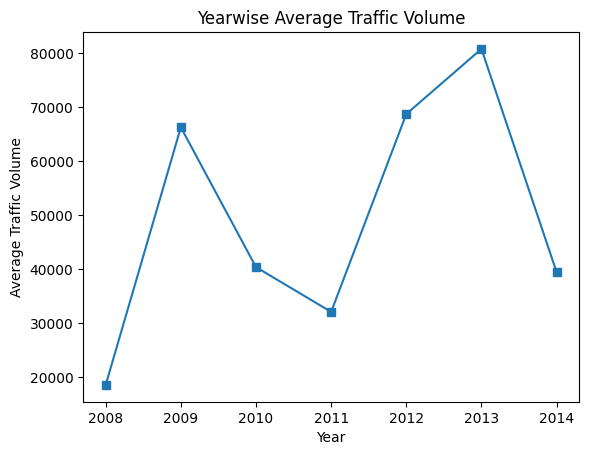

In [23]:
# Create a grouped dataframe
grouped_df = train_copy.groupby("Year").sum()

# plotting the average for easier understanding
plt.plot(grouped_df.index, grouped_df["Traffic_Vol"]/365, marker="s")
plt.title("Yearwise Average Traffic Volume")
plt.xlabel("Year")
plt.ylabel("Average Traffic Volume")
plt.show()

#### Month wise Traffic Volume over the years


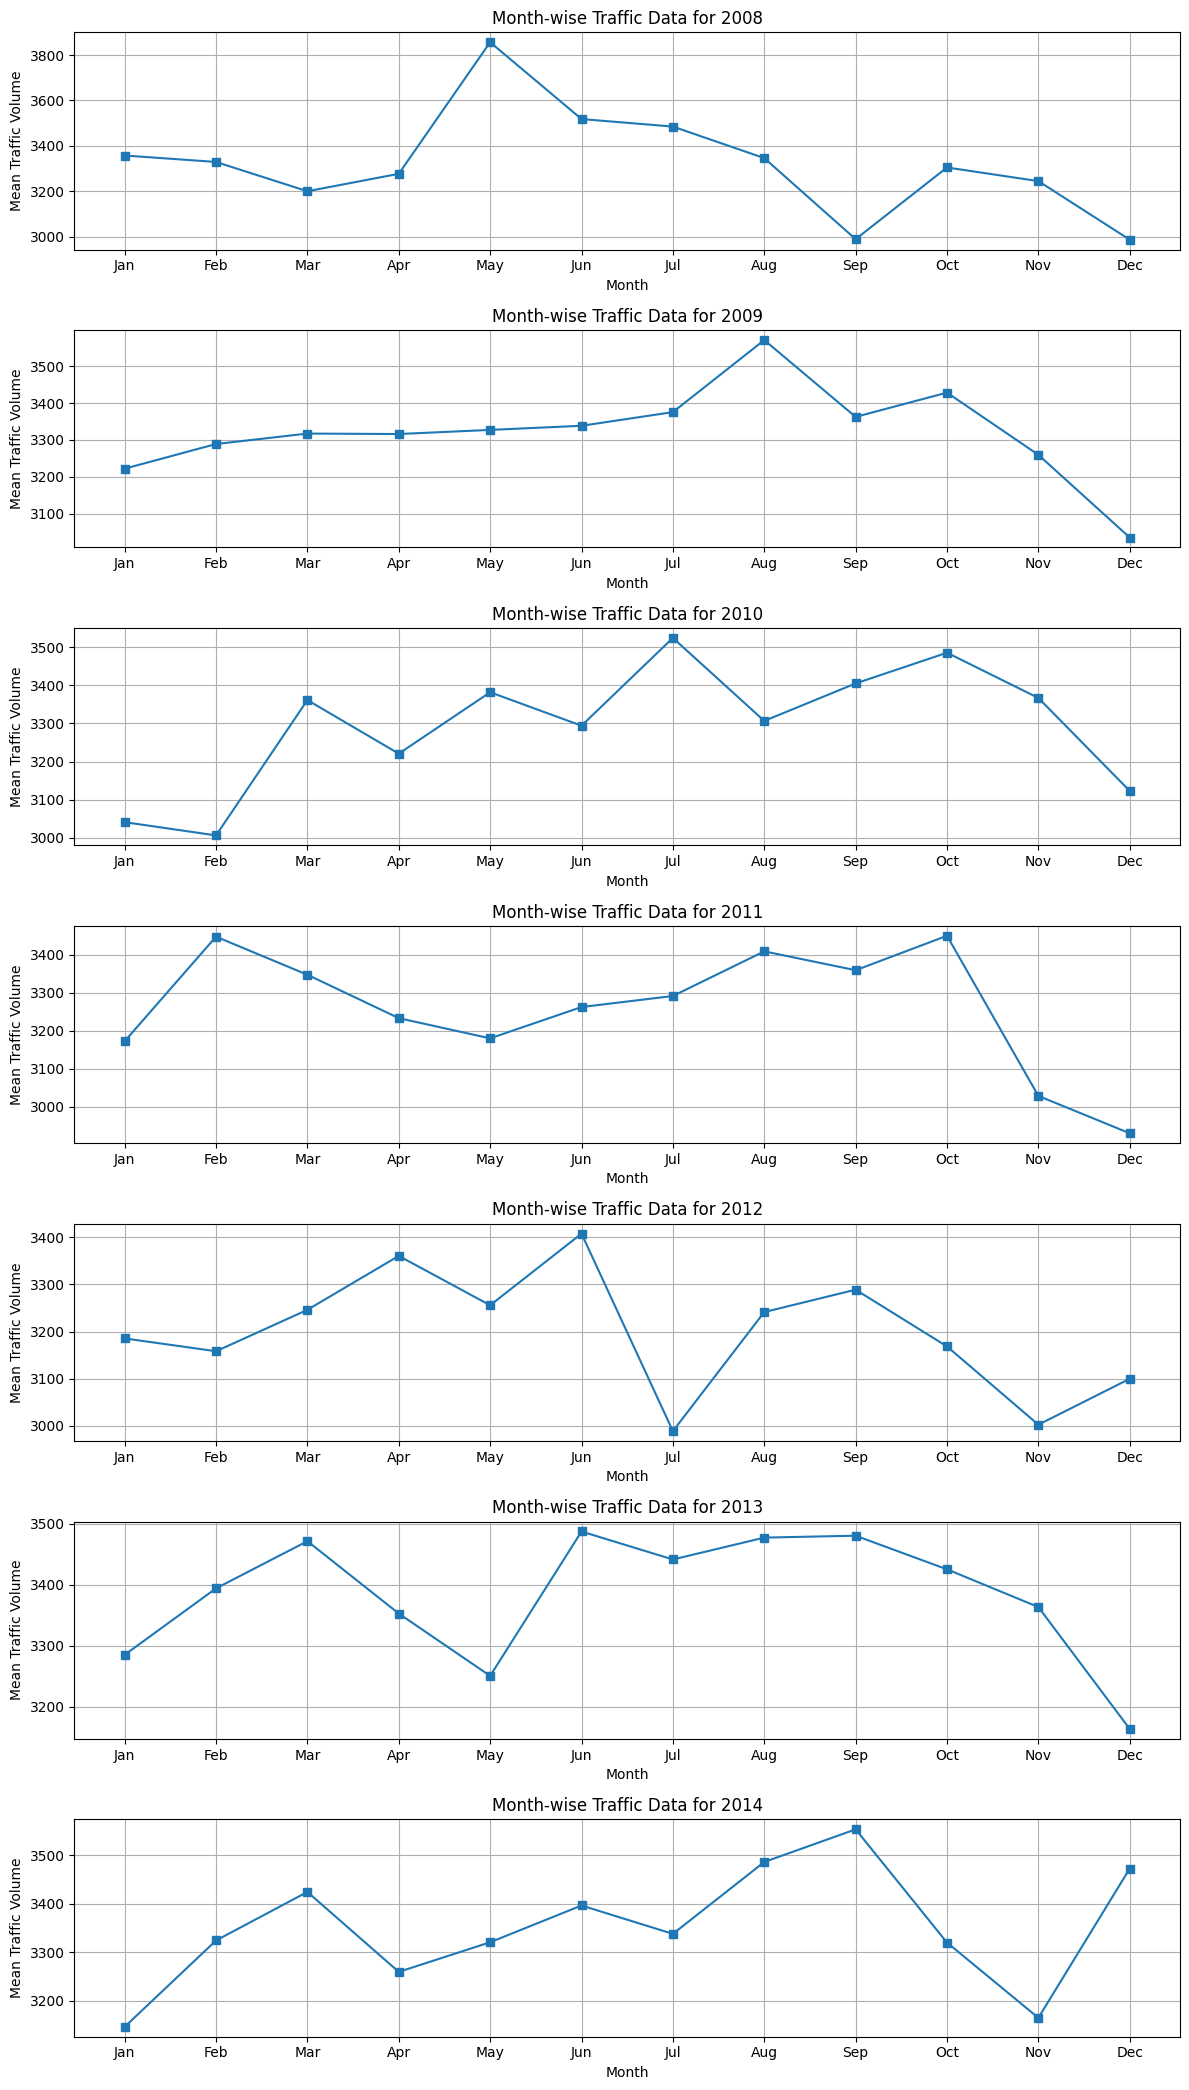

In [24]:
# Create new columns for Year and Month
train_copy["Year"] = train_copy.index.year
train_copy["Month"] = train_copy.index.month

# Group by Year and Month and calculate mean
grouped_month_year = train_copy.drop(
    cat_columns, axis=1).groupby(["Year", "Month"]).mean()

# Get the unique years
years = grouped_month_year.index.get_level_values('Year').unique()

# Create subplots - one subplot for each year
fig, axes = plt.subplots(len(years), 1, figsize=(12, 3 * len(years)))

# If there's only one subplot, axes is a single object, so convert it to a list for consistency
if len(years) == 1:
    axes = [axes]

# Loop through each year and plot the month-wise data on its respective subplot
for i, year in enumerate(years):
    monthly_data = grouped_month_year.loc[year]

    # Plot the data for the current year on the corresponding subplot
    axes[i].plot(monthly_data.index, monthly_data['Traffic_Vol'],
                 label=str(year), marker="s")

    # Title and labels for each subplot
    axes[i].set_title(f'Month-wise Traffic Data for {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Mean Traffic Volume')

    # Set x-axis ticks to show month names
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May',
                            'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Display grid
    axes[i].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Day wise Average Traffic Volume


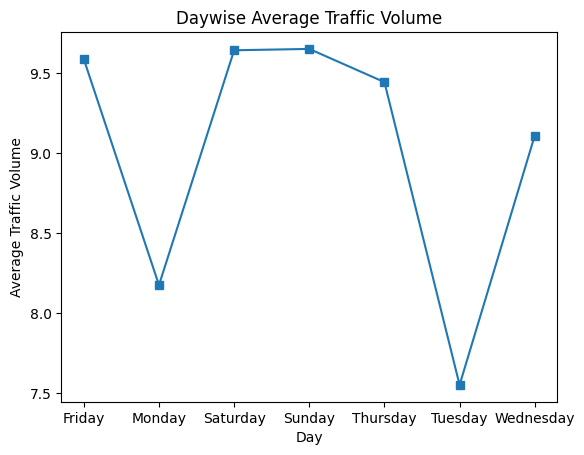

In [25]:
grouped_day = train_copy.drop(
    ["Weather", "Weather_Desc", "Holiday"], axis=1).groupby("Day").mean()


# plotting the average for easier understanding
plt.plot(grouped_day.index, grouped_day["Traffic_Vol"]/365, marker="s")
plt.title("Daywise Average Traffic Volume")
plt.xlabel("Day")
plt.ylabel("Average Traffic Volume")
plt.show()

### Univariate Analysis


#### Numeric columns


Temperature
Skew: -2.44


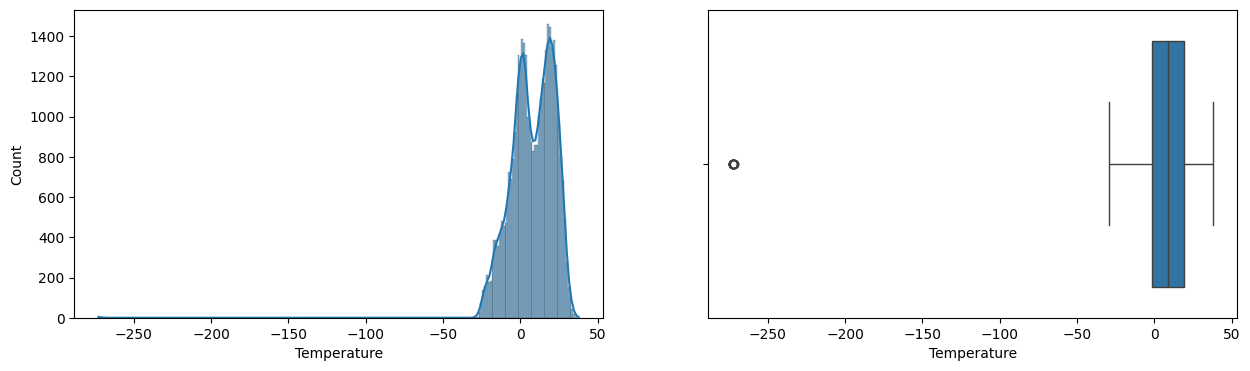

Rainfall_last_hour
Skew: 195.82


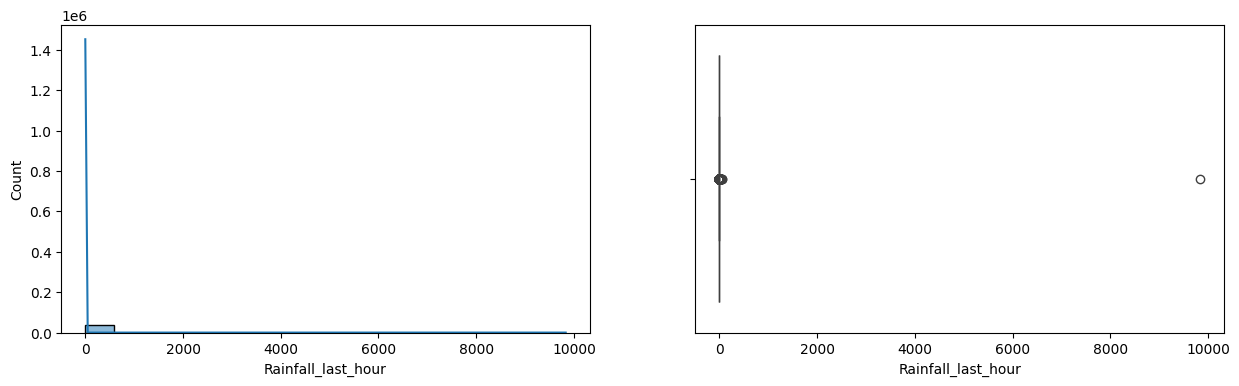

Snowfall_last_hour
Skew: 62.96


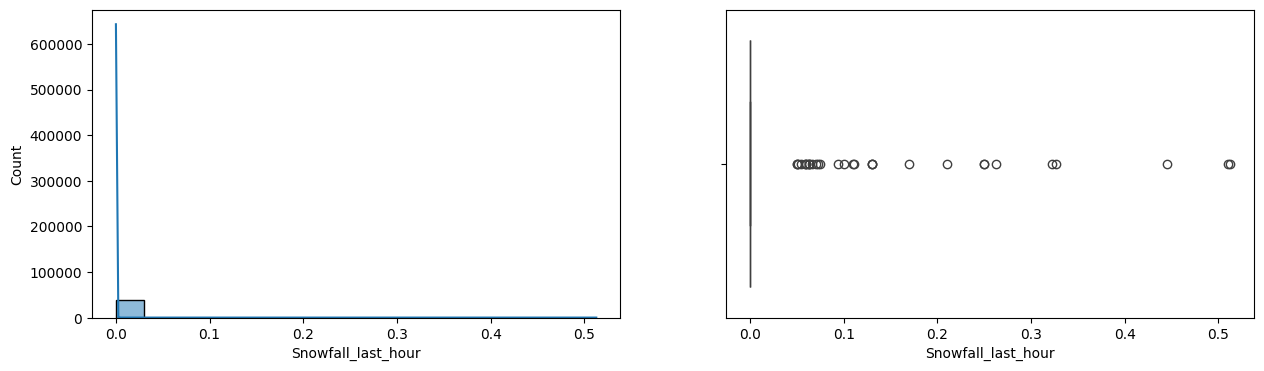

Cloud_Cover
Skew: 0.01


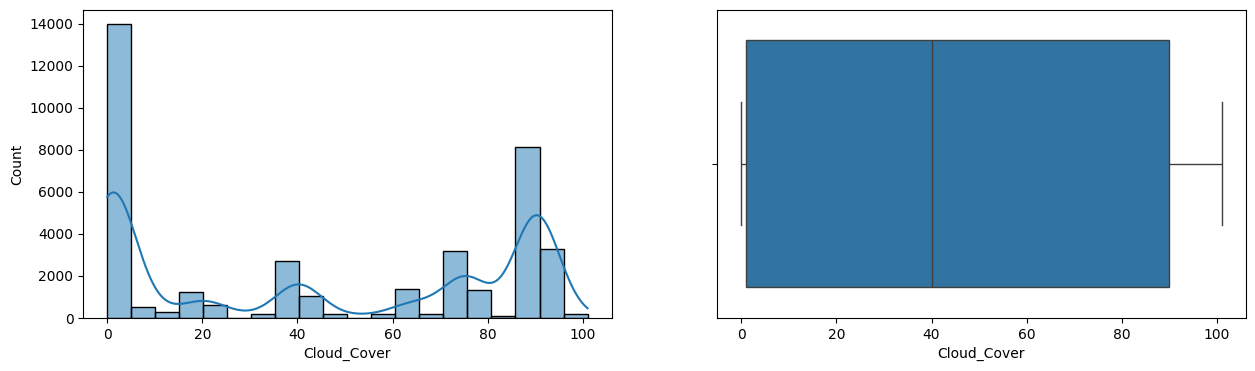

Traffic_Vol
Skew: -0.1


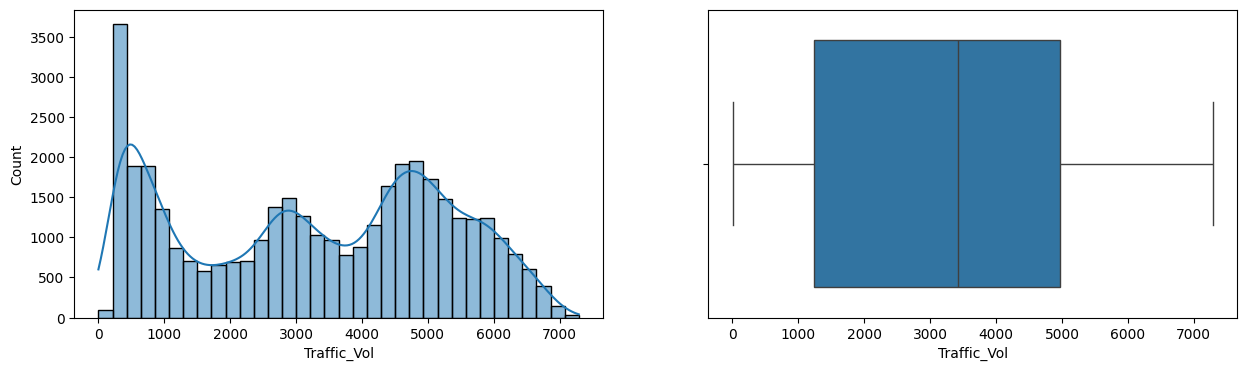

In [26]:
for col in num_columns:
    print(col)
    print(f"Skew: {round(train[col].skew(), 2)}")
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=train, x=col, kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(train, x=col)
    plt.show()

In [27]:
train.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,Weather_Desc,Traffic_Vol,Day
TimeStamp,,,,,,,,,
2008-02-10 09:00:00,No,16.13,0.0,0.0,40,Cloudy skies,Partly cloudy skies,5555,Sunday
2008-02-10 10:00:00,No,17.11,0.0,0.0,75,Cloudy skies,Fragmented clouds,4525,Sunday
2008-02-10 11:00:00,No,17.13,0.0,0.0,90,Cloudy skies,Full cloud cover,4772,Sunday
2008-02-10 12:00:00,No,17.18,0.0,0.0,90,Cloudy skies,Full cloud cover,5031,Sunday
2008-02-10 13:00:00,No,18.99,0.0,0.0,75,Cloudy skies,Fragmented clouds,4928,Sunday


#### Transforming the Data to reduce skewness


In [28]:
for col in num_columns:
    skewness = train[col].skew()
    print(f"{col}: Skewness = {round(skewness, 2)}")

    if skewness > 0.5:
        print(f"Applying log transformation to {col}")
        # Shift to avoid negative values
        train[col] = np.log1p(train[col] - train[col].min() + 1)
        print(f"{col}: New Skewness = {round(train[col].skew(), 2)}")

    elif skewness < -0.5:
        print(f"Applying power transformation to {col}")
        # You can experiment with other powers if necessary
        train[col] = train[col]**2
        print(f"{col}: New Skewness = {round(train[col].skew(), 2)}")

    else:
        print(f"No transformation applied to {col}")

Temperature: Skewness = -2.44
Applying power transformation to Temperature
Temperature: New Skewness = 58.3
Rainfall_last_hour: Skewness = 195.82
Applying log transformation to Rainfall_last_hour
Rainfall_last_hour: New Skewness = 15.17
Snowfall_last_hour: Skewness = 62.96
Applying log transformation to Snowfall_last_hour
Snowfall_last_hour: New Skewness = 60.68
Cloud_Cover: Skewness = 0.01
No transformation applied to Cloud_Cover
Traffic_Vol: Skewness = -0.1
No transformation applied to Traffic_Vol


In [29]:
# Adjust skewness for test data as well
for col in num_columns:
    skewness = test[col].skew()
    print(f"{col}: Skewness = {round(skewness, 2)}")

    if skewness > 0.5:
        print(f"Applying log transformation to {col}")
        # Shift to avoid negative values
        test[col] = np.log1p(test[col] - test[col].min() + 1)
        print(f"{col}: New Skewness = {round(test[col].skew(), 2)}")

    elif skewness < -0.5:
        print(f"Applying power transformation to {col}")
        # You can experiment with other powers if necessary
        test[col] = test[col]**2
        print(f"{col}: New Skewness = {round(test[col].skew(), 2)}")

    else:
        print(f"No transformation applied to {col}")

Temperature: Skewness = -0.47
No transformation applied to Temperature
Rainfall_last_hour: Skewness = 6.2
Applying log transformation to Rainfall_last_hour
Rainfall_last_hour: New Skewness = 3.83
Snowfall_last_hour: Skewness = 0.0
No transformation applied to Snowfall_last_hour
Cloud_Cover: Skewness = 0.34
No transformation applied to Cloud_Cover
Traffic_Vol: Skewness = nan
No transformation applied to Traffic_Vol


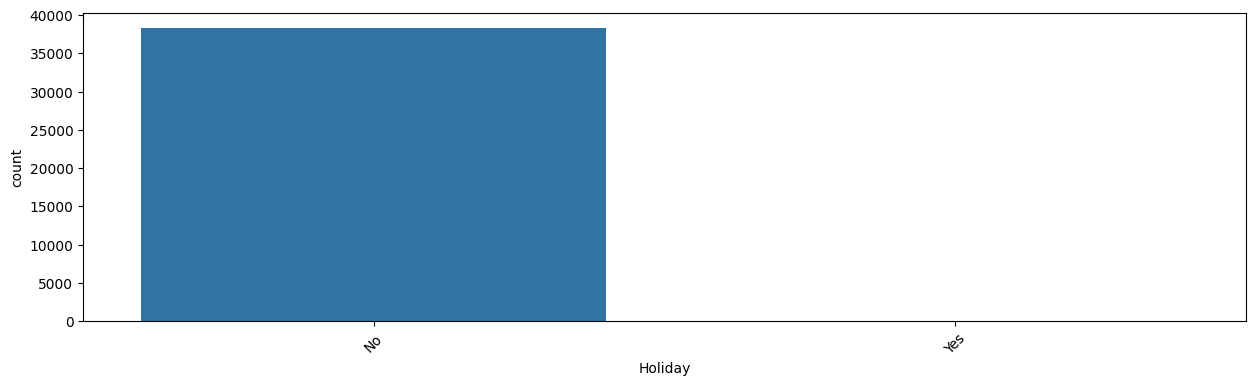

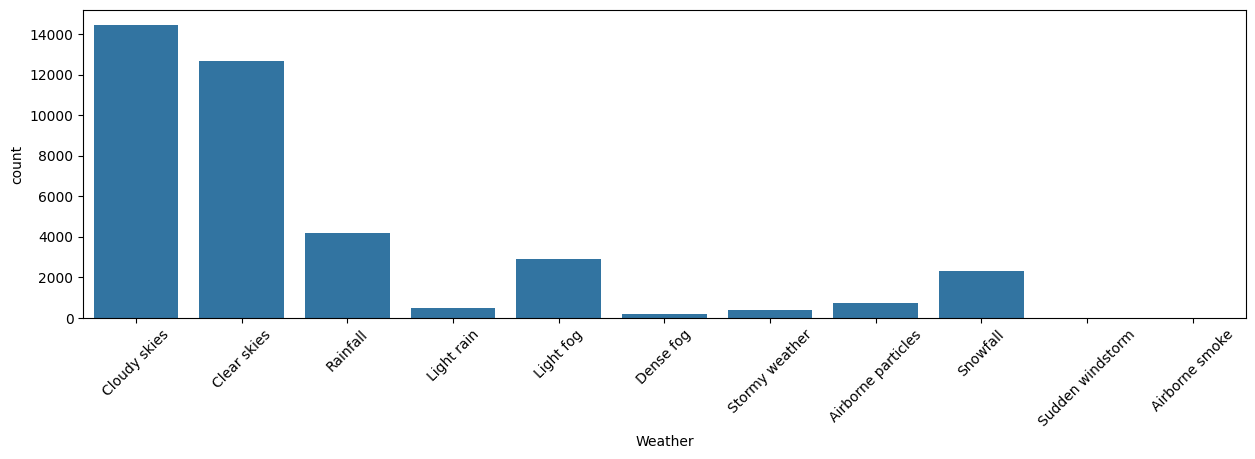

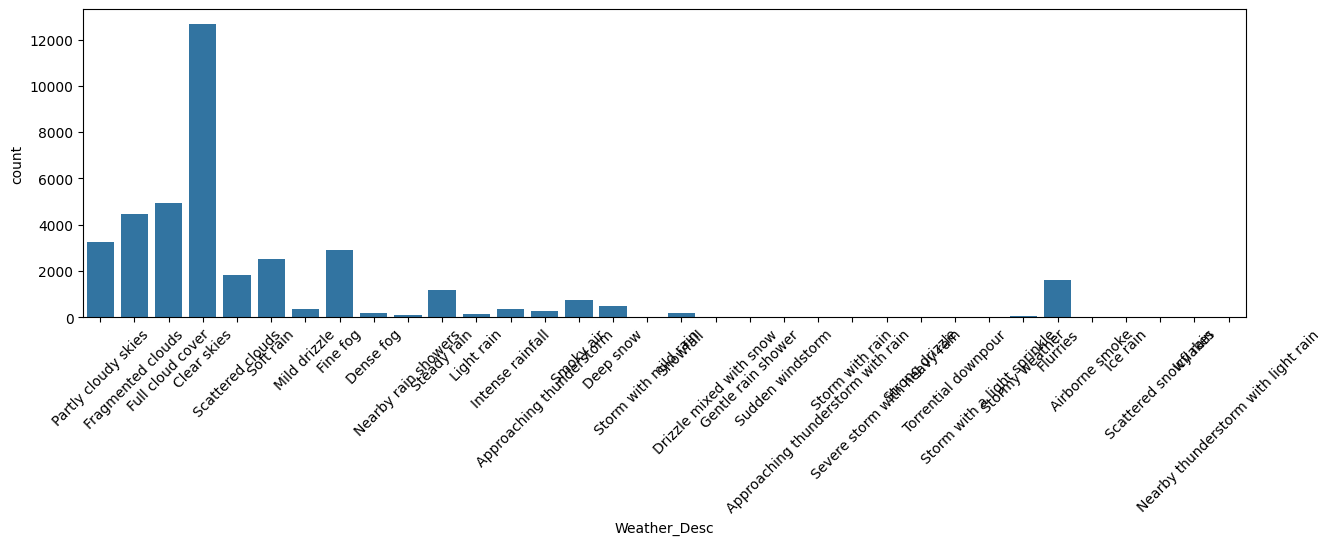

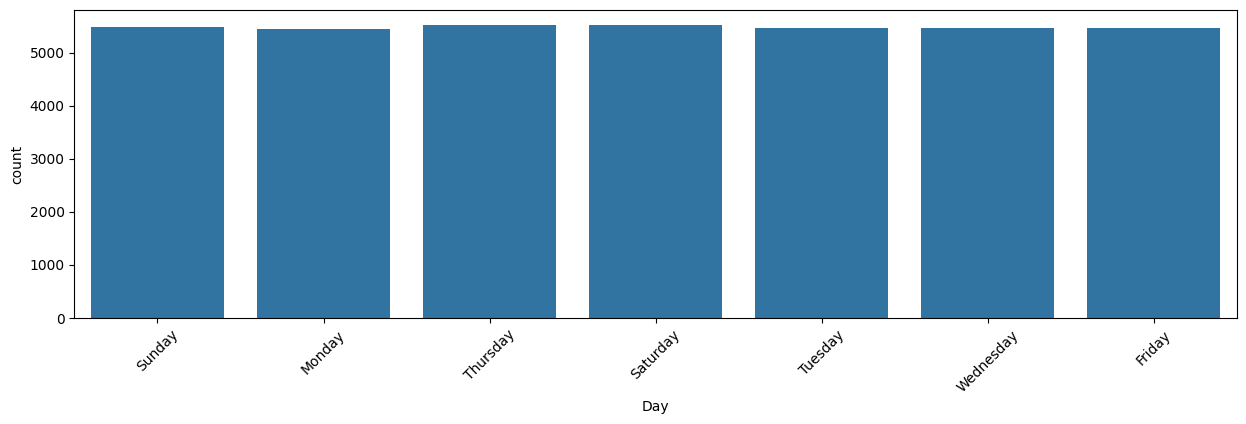

In [30]:
for column in cat_columns:
    plt.figure(figsize=(15, 4))
    sns.countplot(data=train, x=column)
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis


<Figure size 1300x1700 with 0 Axes>

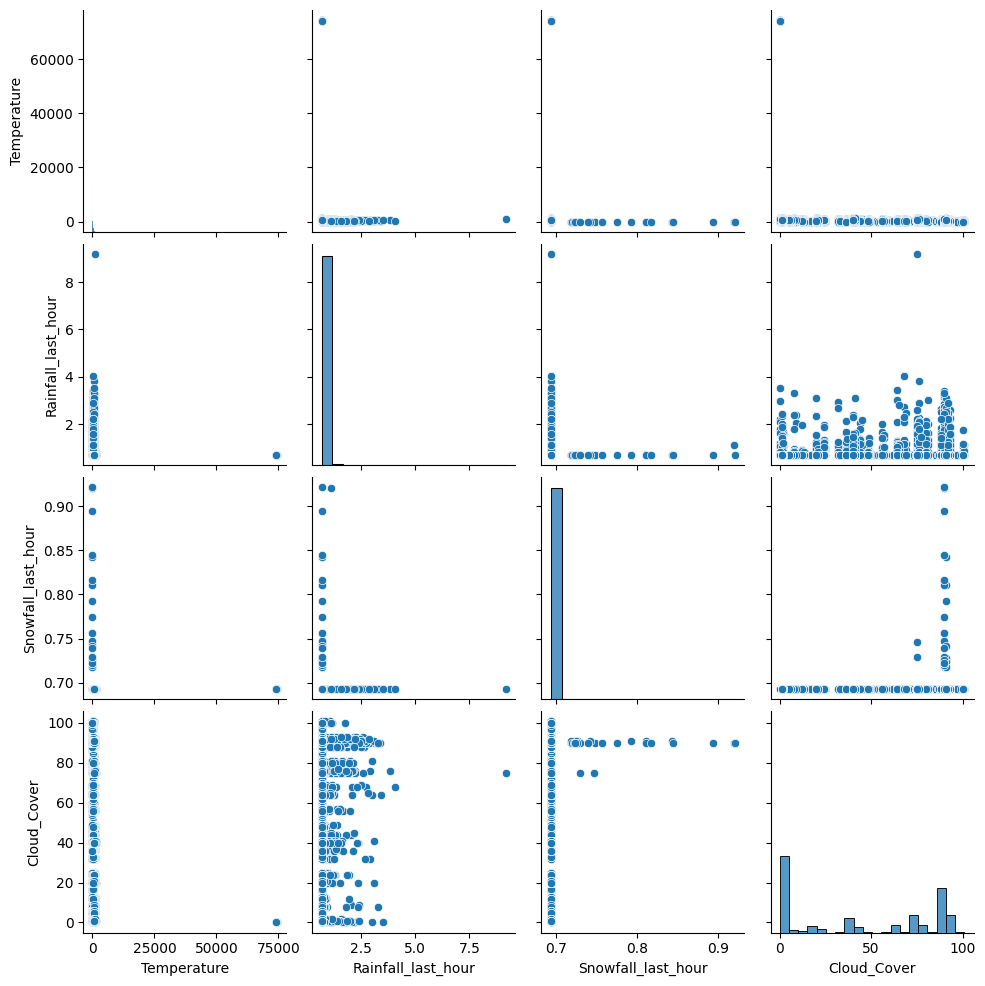

In [31]:
plt.figure(figsize=(13, 17))
sns.pairplot(train.drop("Traffic_Vol", axis=1))
plt.show()

### Multivariate Analysis


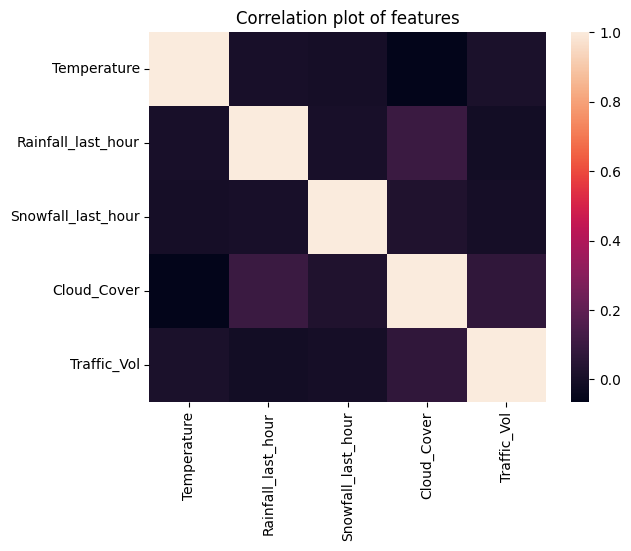

In [32]:
# Plot the correlation plot
sns.heatmap(train.corr(numeric_only=True))
plt.title("Correlation plot of features")
plt.show()

### Convert the categorical columns into numerical columns


In [34]:
# concatenate the train and test sets to avoid mismatch of features (i.e shape of train and  test sets)
data = pd.concat([train, test])

# One hot encode using get dummies method
data = pd.get_dummies(data, dtype=int)

# split back the train and test sets
train_encoded = data.iloc[:len(train), :]
test_encoded = data.iloc[len(train):, :]

data.head()

,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Traffic_Vol,Holiday_No,Holiday_Yes,Weather_Airborne particles,Weather_Airborne smoke,Weather_Clear skies,...,Weather_Desc_Strong drizzle,Weather_Desc_Sudden windstorm,Weather_Desc_Torrential downpour,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2008-02-10 09:00:00,260.1769,0.693147,0.693147,40,5555.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2008-02-10 10:00:00,292.7521,0.693147,0.693147,75,4525.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2008-02-10 11:00:00,293.4369,0.693147,0.693147,90,4772.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2008-02-10 12:00:00,295.1524,0.693147,0.693147,90,5031.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2008-02-10 13:00:00,360.6201,0.693147,0.693147,75,4928.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
try:
    assert len(train) == len(train_encoded), f"""Train length mismatch: expected {
        len(train)}, got {len(train_encoded)}"""
    assert len(test) == len(test_encoded), f"""Test length mismatch: expected {
        len(test)}, got {len(test_encoded)}"""
    print("Both train and test datasets have the correct lengths.")
except AssertionError as e:
    print(f"Assertion Error: {e}")

Both train and test datasets have the correct lengths.


In [36]:
# Save the train and test sets to the disk
import os

os.makedirs("../Dataset/processed", exist_ok=True)

train_encoded.to_csv("../Dataset/processed/train.csv", header=True)
test_encoded.to_csv("../Dataset/processed/test.csv", header=True)